# Exploratory Data Analysis

## Develop a model to deny or approve Credit Card application

**Load the data and printout some of the initial columns.**
- Notice that the data are not comma seperated but space seperated, hence we added the parameter **sep=' '** in the **read_csv** method.
- Also, there is no header row, initially present in the dataframe, as evident below in **df_without_header**, so when we the dataframe size reduces by one observation. Hence, we add a header row to the data **(dataframe)**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_without_header = pd.read_csv('./australian.csv', sep=' ')
print(df_without_header.shape)

names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
dataframe = pd.read_csv('./australian.csv', sep=' ', names=names)
print(dataframe.shape)

(689, 15)
(690, 15)


Notice the change in the number of rows, between the two output values.
The initial row is not lost.



Let's verify the same by printing out some of the initial rows.

In [2]:
dataframe.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


**Analysing the type of data each column contains**

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
A    690 non-null int64
B    690 non-null float64
C    690 non-null float64
D    690 non-null int64
E    690 non-null int64
F    690 non-null int64
G    690 non-null float64
H    690 non-null int64
I    690 non-null int64
J    690 non-null int64
K    690 non-null int64
L    690 non-null int64
M    690 non-null int64
N    690 non-null int64
O    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


**Generating an overall summary of the data**

In [4]:
print(dataframe.shape)
dataframe.describe()

(690, 15)


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Categorical and Numerical Data
The dataset description clearly mentions the categorical and numerical features present in the dataset.

### Categorical Features
* A
* D
* H
* I
* K
* L
* O

### Numerical Featues
* B
* C
* E
* F
* G
* J
* M
* N

In [5]:
categorical_columns = ['A','D','H','I','K','L','O']
numerical_columns = list(set(dataframe.columns) - set(categorical_columns))
print(numerical_columns)
print(categorical_columns)

['C', 'B', 'E', 'G', 'F', 'J', 'M', 'N']
['A', 'D', 'H', 'I', 'K', 'L', 'O']


## HISTPLOT

In [6]:
%matplotlib inline

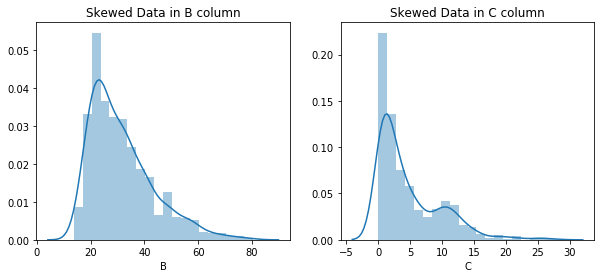

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Skewed Data in B column')
sns.distplot(dataframe['B'], kde=True)
plt.subplot(122)
plt.title('Skewed Data in C column')
sns.distplot(dataframe['C'], kde=True)
plt.show()

In [8]:
import scipy.stats
print(scipy.stats.skew(dataframe['B']))
print(scipy.stats.skew(dataframe['C']))

1.15342058644
1.48557461797


Both the columns have right-skewed data.

Applying, **square root** transform to remove skewness in the data.

In [9]:
dataframe['B'] = np.sqrt(dataframe['B'])
dataframe['C'] = np.sqrt(dataframe['C'])

print(scipy.stats.skew(dataframe['B']))
print(scipy.stats.skew(dataframe['C']))

0.752081583542
0.507693302174


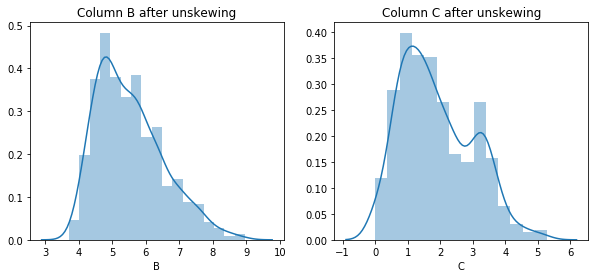

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Column B after unskewing')
sns.distplot(dataframe['B'], kde=True)
plt.subplot(122)
plt.title('Column C after unskewing')
sns.distplot(dataframe['C'], kde=True)
plt.show()

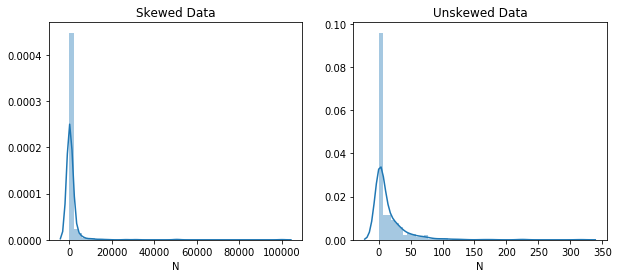

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Skewed Data')
sns.distplot(dataframe['N'], kde=True)
dataframe['N'] = np.sqrt(dataframe['N'])
plt.subplot(122)
plt.title('Unskewed Data')
sns.distplot(dataframe['N'], kde=True)
plt.show()

As evident from both the plot and the numerical value, it's clear that the skewness in the data has been reduced.

## BOXPLOT

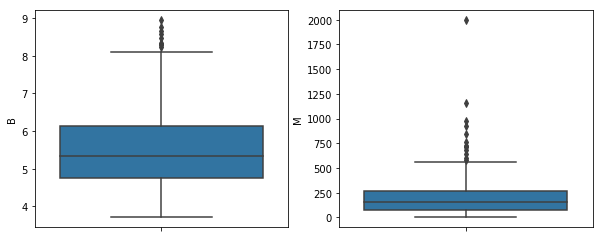

In [12]:
facet=None
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(facet, dataframe['B'])
plt.subplot(122)
sns.boxplot(facet, dataframe['M'])
plt.show()

Most of the values in the **B** column have values beyond 6, whereas in **M** column many values are beyond 600 mark and they are most likely to be outliers.

This information can be useful while we deal with outliers.


## COUNTPLOT

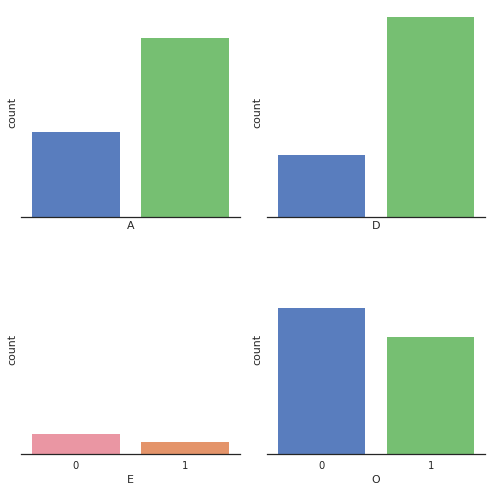

In [13]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
sns.despine(left=True)
sns.countplot(dataframe['A'], ax=axes[0,0])
sns.countplot(dataframe['D'], ax=axes[0,1])
sns.countplot(dataframe['E'], ax=axes[1,0])
sns.countplot(dataframe['O'], ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()

The categorical datas don't seem to be imbalanced.So, we can proceed further.

**Exploring the Numerical Columns in the dataset.**

Plotting numerical columns against each other, would help us analyze the outliers better.

## OPTIONAL

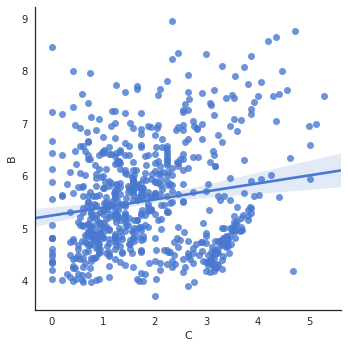

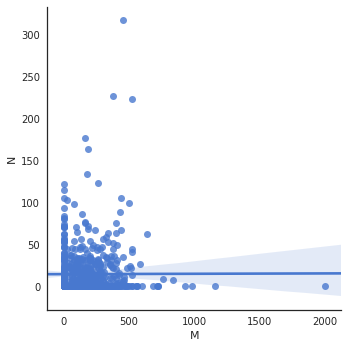

In [14]:
plt.figure(figsize=(10,4))
sns.lmplot('C', 'B', data=dataframe, fit_reg=True)
sns.lmplot('M', 'N', data=dataframe, fit_reg=True)
plt.show()

### Determining correlation between the Numerical Columns.
Some predictive models, such as **Linear Regression** perform poorly, if the data is highly correlated, hence, it is needed to remove them.

Heatmaps are a good way to check whether the columns are correlated with each other, as they enable comparing all the numerical features in a single place. 

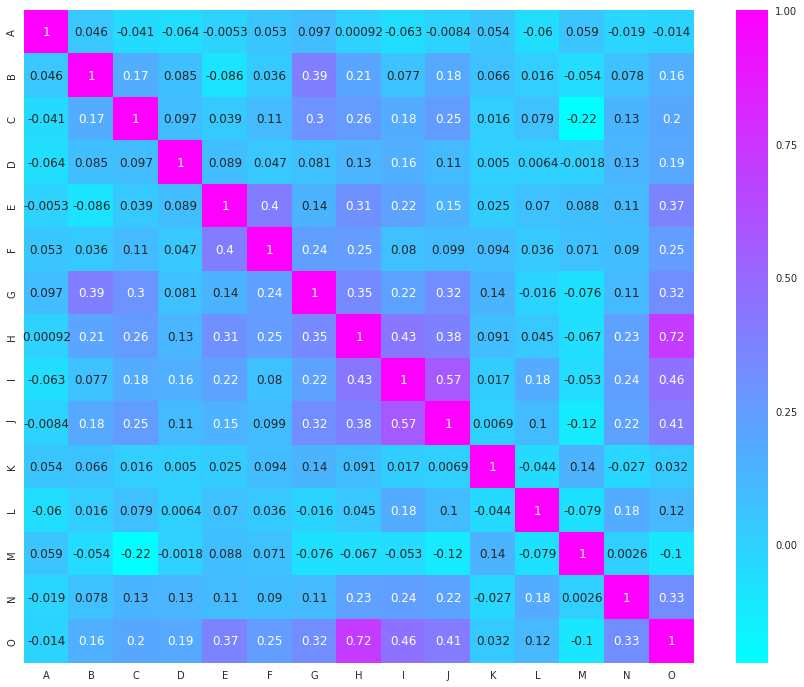

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(dataframe.corr(), annot=True, cmap='cool')

Darker(Pink) shades denote high correlation whereas Lighter(Blue) shades denote lower correlation between the columns.The bar in the right can be used to refer the correlation value between other columns.
As evident, **H** is highly correlated with **O**, whereas **B** and **M** are not correlated.

So, we might remove columns **H** and **J**.

# Data Cleaning

### Removing Outliers
In the **M** _vs_ **N** graph, we could observe that, all values in N greater than 150 are outliers.

Similarily, in the M column, values beyond 1000 are outliers.

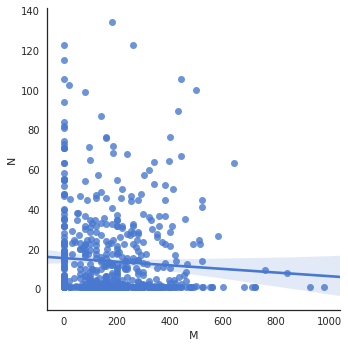

In [16]:
dataframe = dataframe.drop(dataframe[(dataframe['N']>150)].index)
dataframe = dataframe.drop(dataframe[(dataframe['M']>1000)].index)

sns.lmplot('M', 'N', data=dataframe, fit_reg=True)

### Handling Null Values
Finding out the number of null values, in each column.

In [17]:
dataframe.isnull().sum(axis=0)

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
dtype: int64

There are no null or empty values in the entire dataset.So, we need not worry about them.

In [18]:
# seperating original dataframe into categorical and numerical dataframes
from sklearn import preprocessing
numerical_data = dataframe[['C', 'B', 'E', 'G', 'F', 'J', 'M', 'N']]
categorical_data = dataframe[['A', 'D', 'H', 'I', 'K', 'L', 'O']]

# standardizing the numerical data
numerical_data = pd.DataFrame(preprocessing.scale(numerical_data))

In [19]:
print(numerical_data.shape, categorical_data.shape)
type(categorical_data)

((683, 8), (683, 7))


pandas.core.frame.DataFrame

data = pd.concat([numerical_data,categorical_data], axis=1, ignore_index=True, names=dataframe.columns)
data.shape

Things that could have been done :
* Combine columns into one
* For any categorical feature, combine sparse values into 1 as "Others" or something meaningful.

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dataframe.iloc[:,0:14]
y = dataframe.iloc[:, 14]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [32]:
# accuracy with ensembling technique
bagging_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                               n_estimators=100,
                               max_samples=100,
                               bootstrap=True,
                               random_state=9)

bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bagging)
print(accuracy)

0.836257309942


In [34]:
# accuracy with boosting technique
from xgboost import XGBClassifier
xgboost_clf = XGBClassifier()
xgboost_clf.fit(X_train, y_train)
y_pred_xgboost = xgboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgboost)
print(accuracy)

ImportError: No module named xgboost

In [1]:
pip install xgboost

SyntaxError: invalid syntax (<ipython-input-1-e14e010d2294>, line 1)